# EDA on Heart attacks in Indonesia and data cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('data/heart_attack_prediction_indonesia.csv')

# examine the data types and basic information:

In [5]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

# Display the first few rows
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (158355, 28)

Data Types:
age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                      

# Data Cleaning and Type Conversion 

In [6]:
# Convert numerical columns to appropriate types
numerical_cols = ['age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 
                 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
                 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert binary columns to integers
binary_cols = ['hypertension', 'diabetes', 'obesity', 'family_history', 
              'previous_heart_disease', 'medication_usage', 
              'participated_in_free_screening', 'heart_attack']

for col in binary_cols:
    df[col] = df[col].astype(int)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
age                                   0
gender                                0
region                                0
income_level                          0
hypertension                          0
diabetes                              0
cholesterol_level                     0
obesity                               0
waist_circumference                   0
family_history                        0
smoking_status                        0
alcohol_consumption               94848
physical_activity                     0
dietary_habits                        0
air_pollution_exposure                0
stress_level                          0
sleep_hours                           0
blood_pressure_systolic               0
blood_pressure_diastolic              0
fasting_blood_sugar                   0
cholesterol_hdl                       0
cholesterol_ldl                       0
triglycerides                         0
EKG_results                           0
previous_heart_disease 

In [8]:
from sklearn.impute import SimpleImputer
# Strategy 1: Impute with the most frequent value (mode)
alcohol_imputer = SimpleImputer(strategy='most_frequent')
df['alcohol_consumption'] = alcohol_imputer.fit_transform(df[['alcohol_consumption']]).ravel()

# Alternative Strategy 2: Create a new category for missing values
# df['alcohol_consumption'] = df['alcohol_consumption'].fillna('Unknown')

print("\nUnique values in alcohol_consumption after imputation:")
print(df['alcohol_consumption'].value_counts())

# Check for any remaining missing values
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Unique values in alcohol_consumption after imputation:
alcohol_consumption
Moderate    142573
High         15782
Name: count, dtype: int64

Missing Values After Imputation:
age                               0
gender                            0
region                            0
income_level                      0
hypertension                      0
diabetes                          0
cholesterol_level                 0
obesity                           0
waist_circumference               0
family_history                    0
smoking_status                    0
alcohol_consumption               0
physical_activity                 0
dietary_habits                    0
air_pollution_exposure            0
stress_level                      0
sleep_hours                       0
blood_pressure_systolic           0
blood_pressure_diastolic          0
fasting_blood_sugar               0
cholesterol_hdl                   0
cholesterol_ldl                   0
triglycerides                     

# Visualizing Outliers 

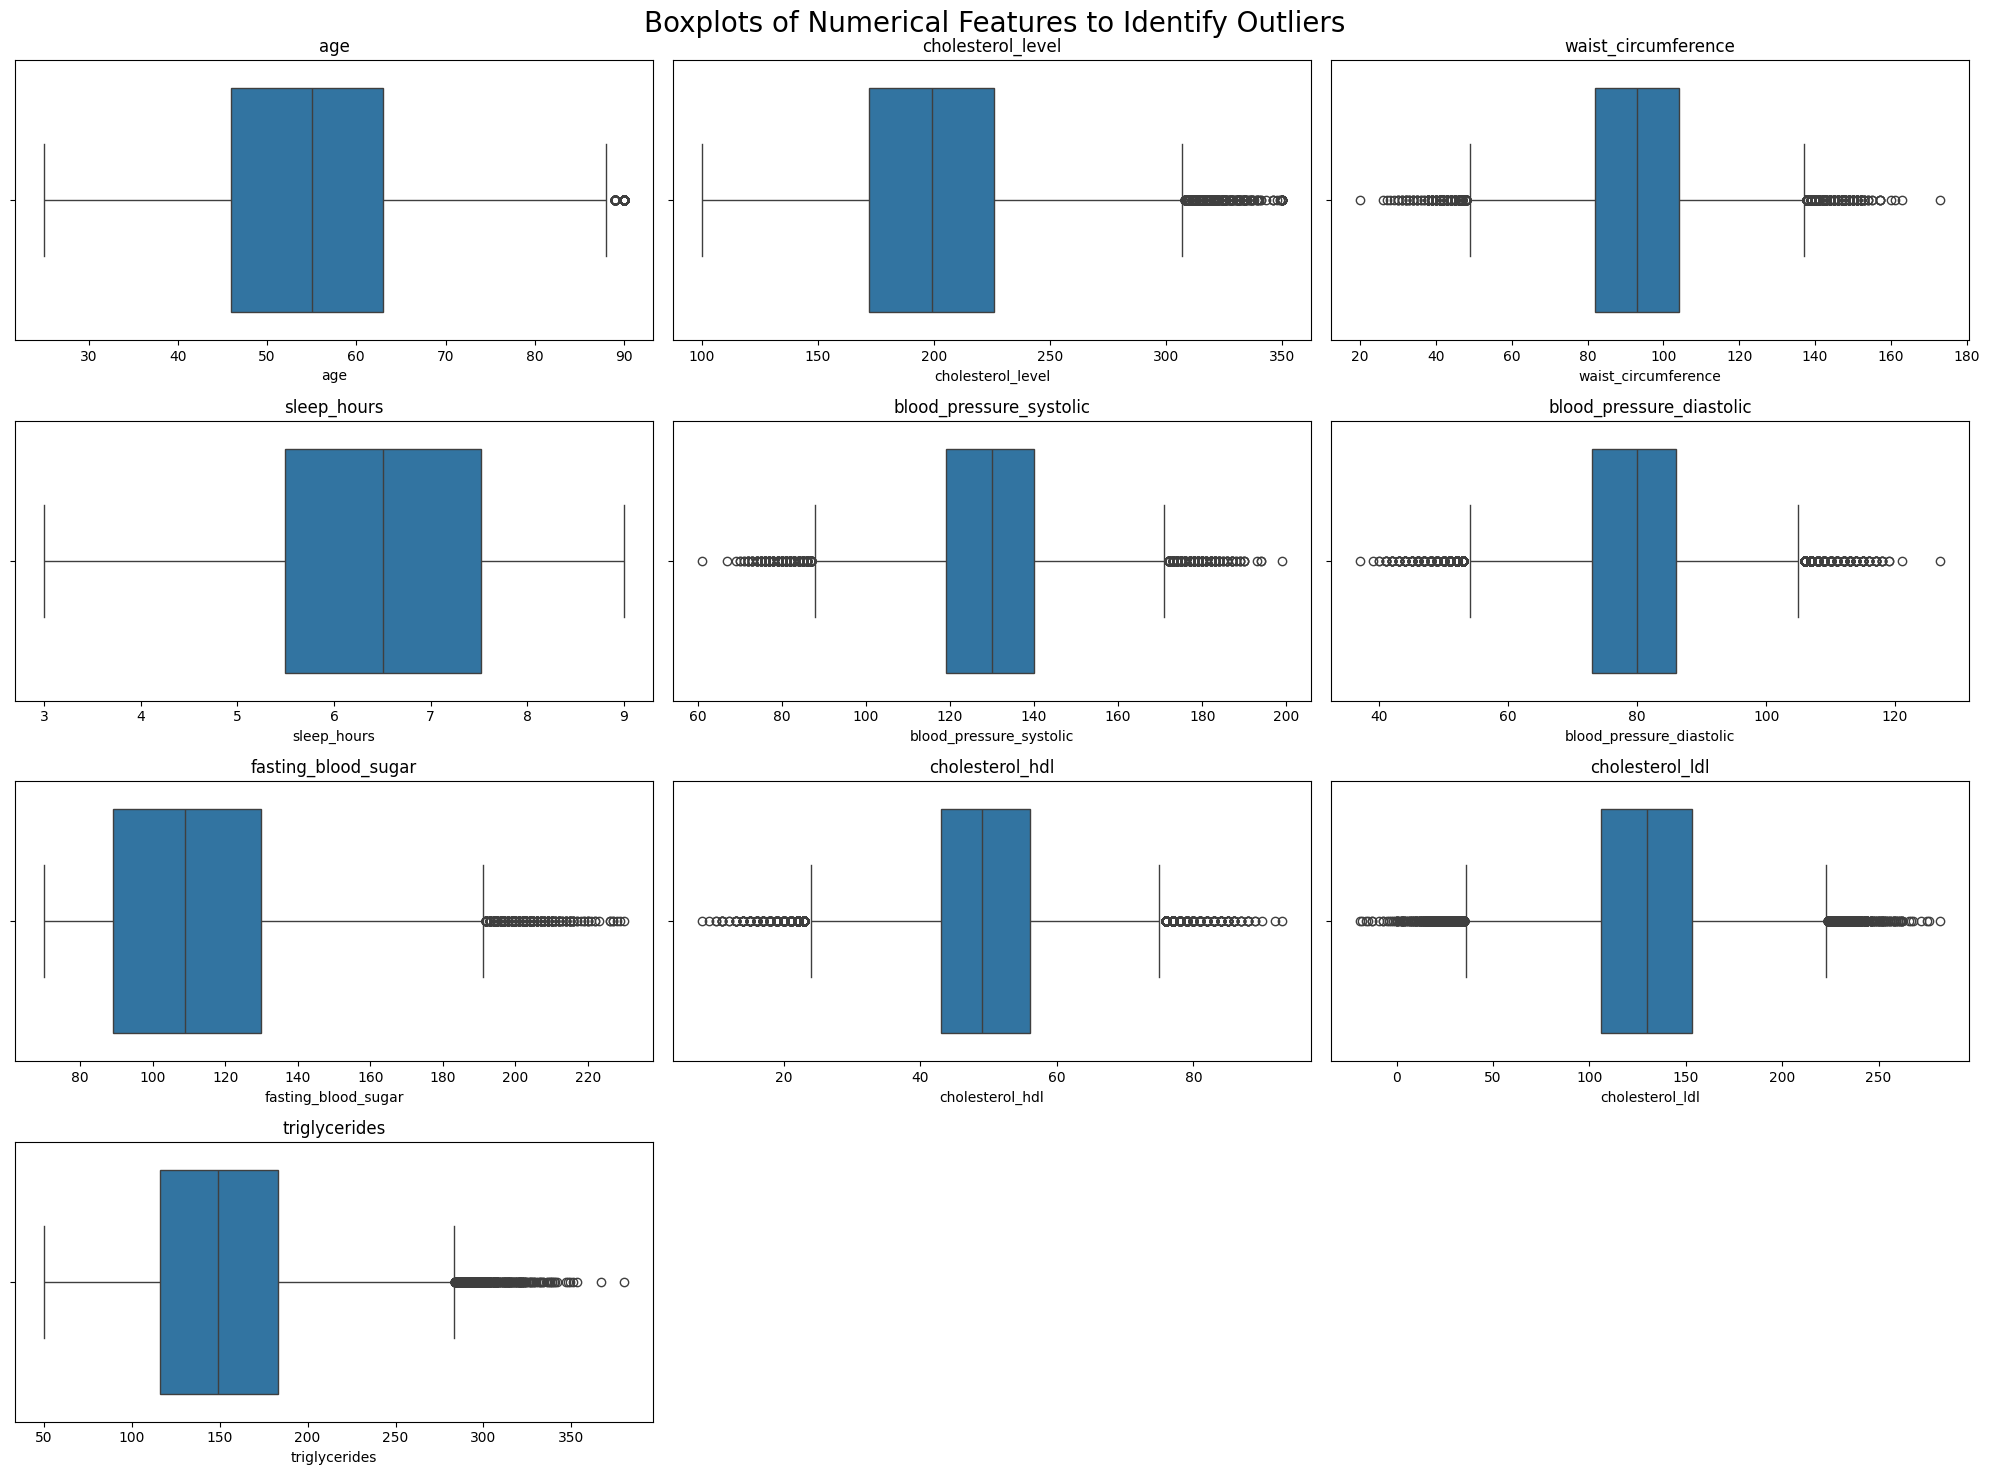

In [9]:
# We'll use the DataFrame 'df' after initial cleaning and missing value imputation
# Make sure numerical columns are in the correct format
numerical_cols = [
    'age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 
    'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar',
    'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides'
]

# Set up the plot
plt.figure(figsize=(20, 15))
plt.suptitle('Boxplots of Numerical Features to Identify Outliers', fontsize=20)

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [11]:
def handle_outliers_capping(dataframe, columns):
    df_capped = dataframe.copy()
    for col in columns:
        lower_bound = df_capped[col].quantile(0.01)
        upper_bound = df_capped[col].quantile(0.99)
        df_capped[col] = np.clip(df_capped[col], lower_bound, upper_bound)
    return df_capped

# Apply the capping function
df_processed = handle_outliers_capping(df, numerical_cols)

Visualizing distributions AFTER handling outliers...


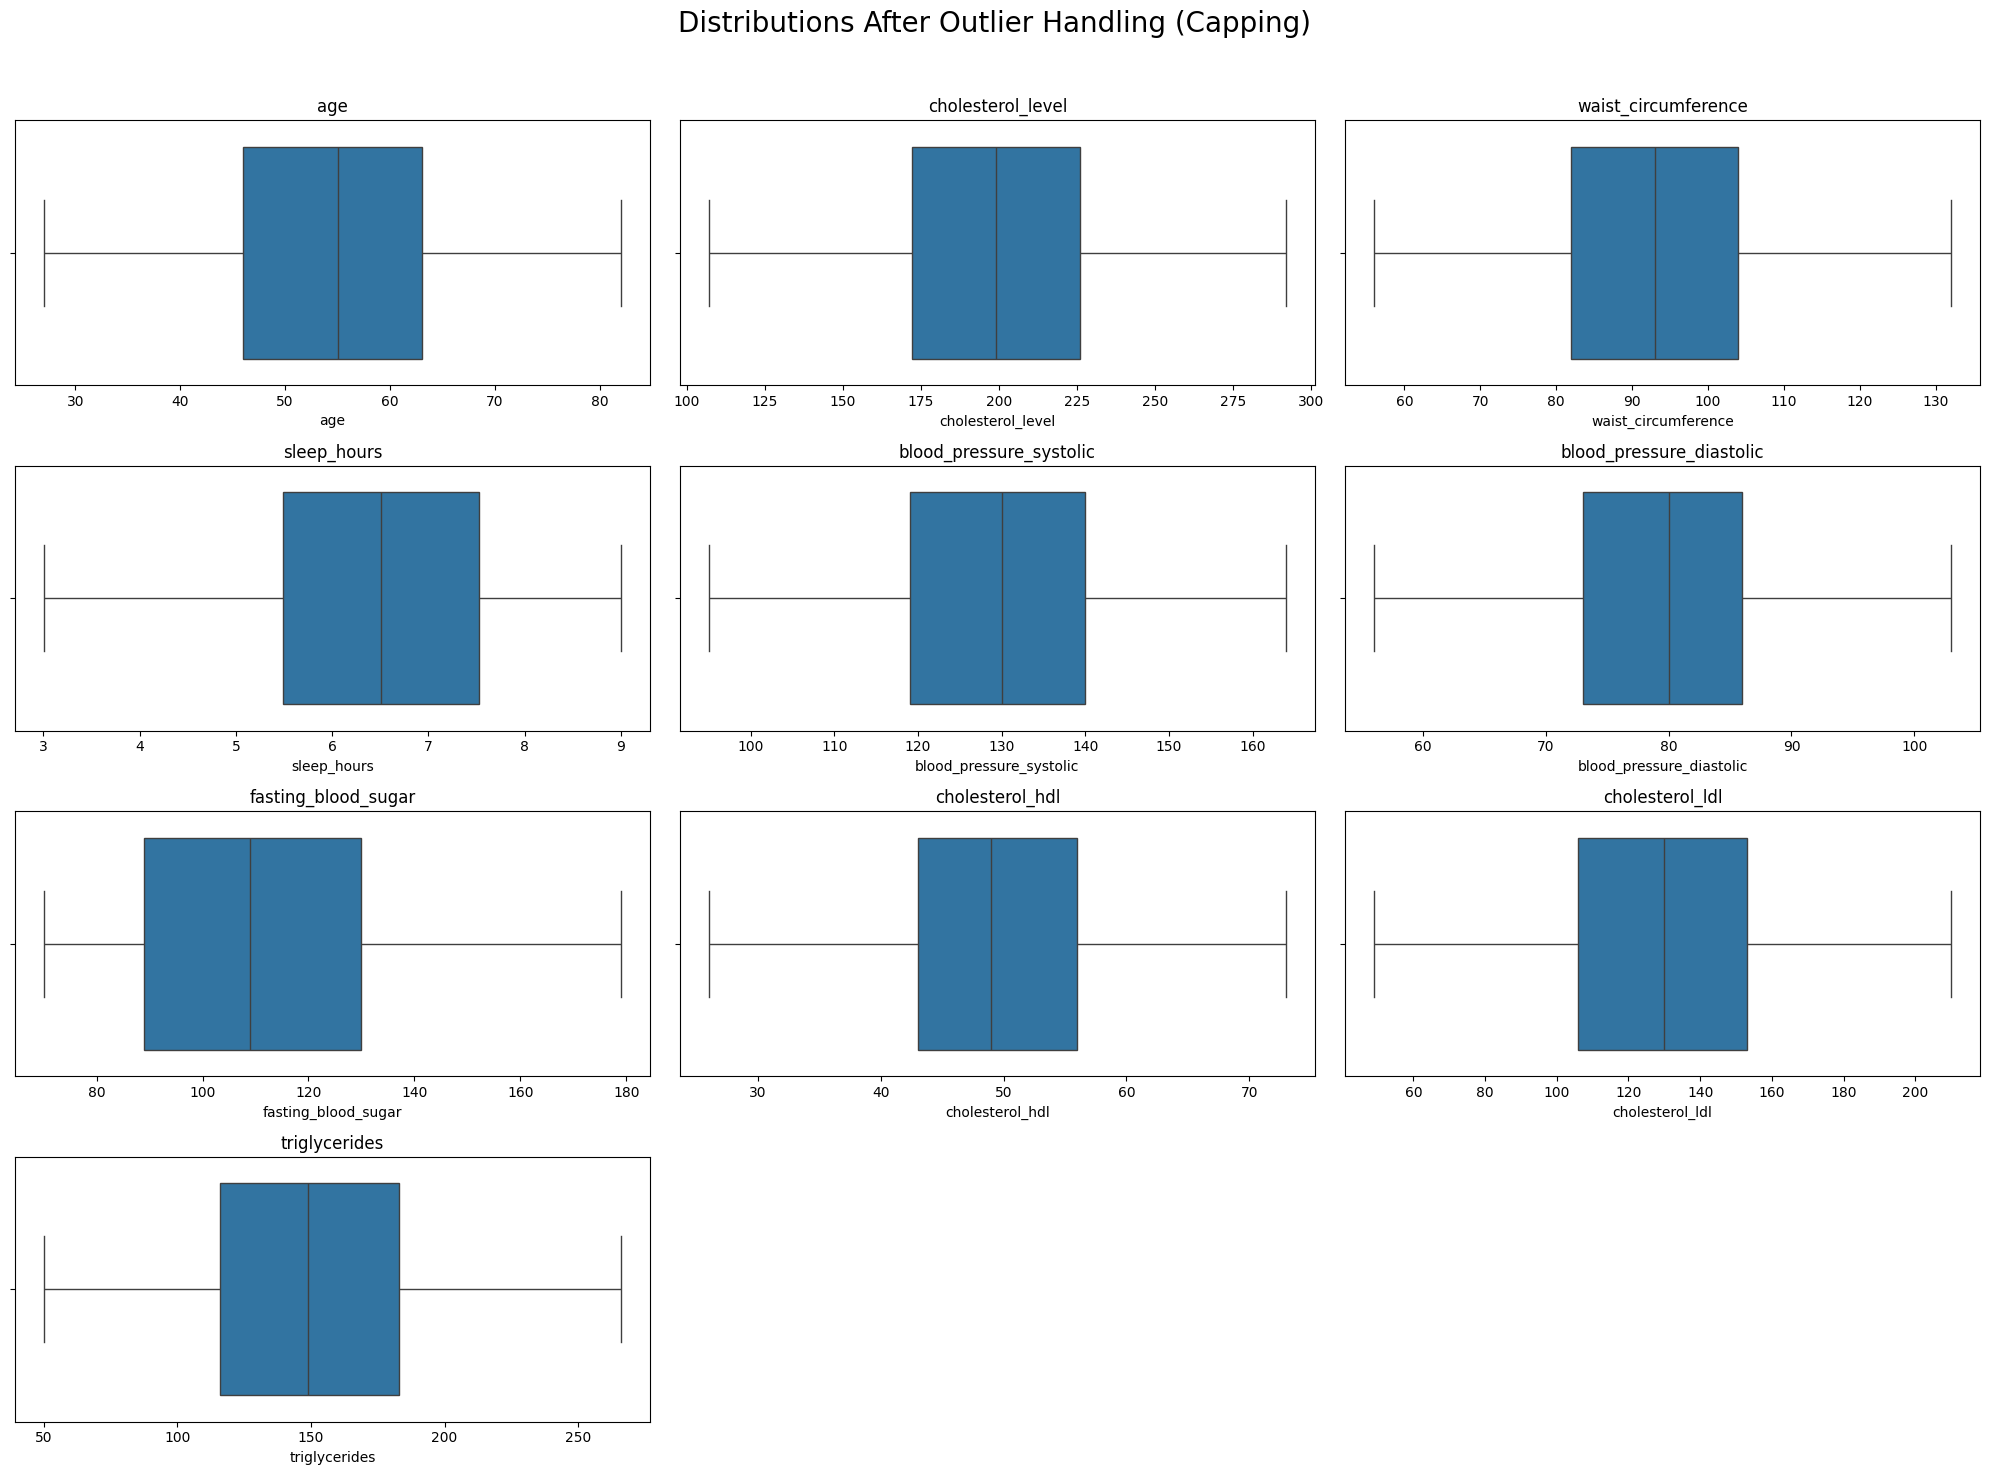

In [12]:
# Visualize distributions AFTER handling outliers
print("Visualizing distributions AFTER handling outliers...")
plt.figure(figsize=(20, 15))
plt.suptitle('Distributions After Outlier Handling (Capping)', fontsize=20)
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df_processed[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# EDA

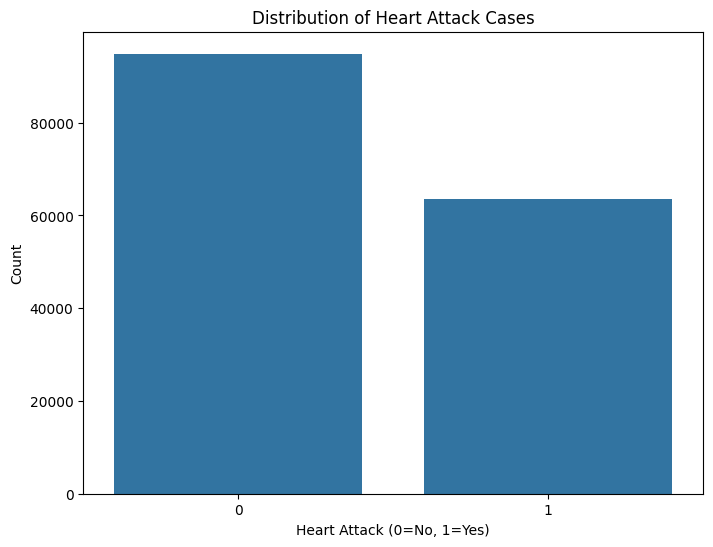


Heart Attack Distribution:
heart_attack
0    0.598996
1    0.401004
Name: proportion, dtype: float64


In [14]:
# Distribution of heart attack cases
plt.figure(figsize=(8, 6))
sns.countplot(x='heart_attack', data=df)
plt.title('Distribution of Heart Attack Cases')
plt.xlabel('Heart Attack (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

print("\nHeart Attack Distribution:")
print(df['heart_attack'].value_counts(normalize=True))

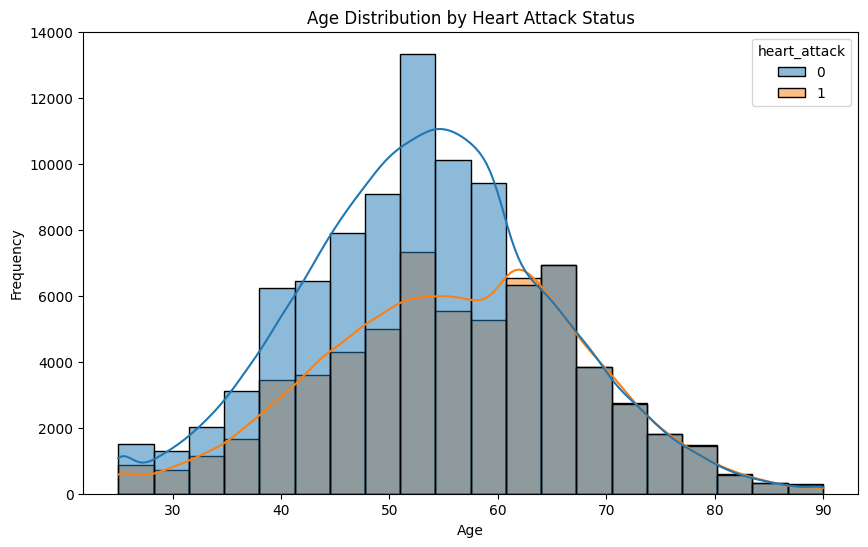

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='heart_attack', kde=True, bins=20)
plt.title('Age Distribution by Heart Attack Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

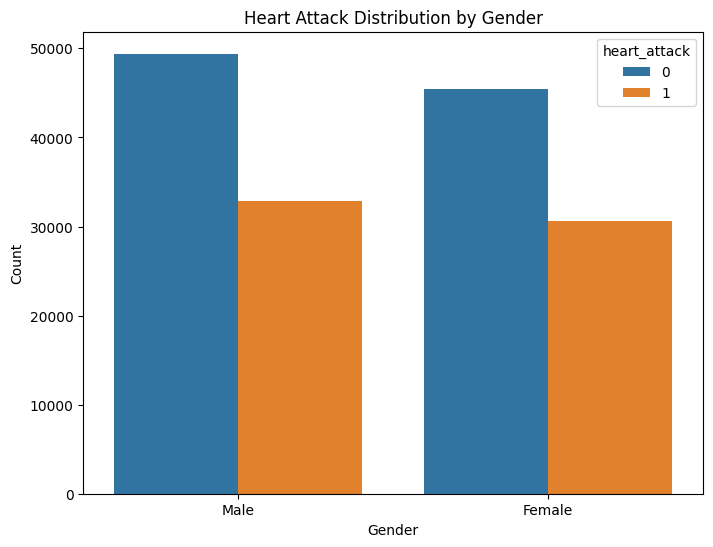

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='heart_attack', data=df)
plt.title('Heart Attack Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

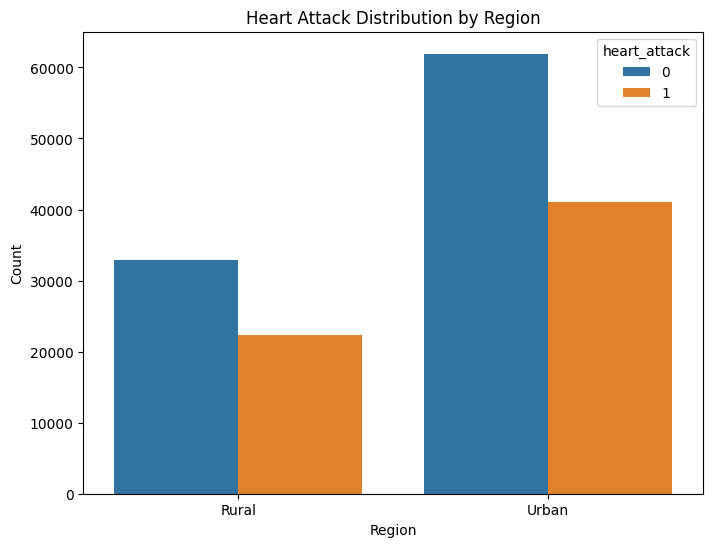

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='region', hue='heart_attack', data=df)
plt.title('Heart Attack Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

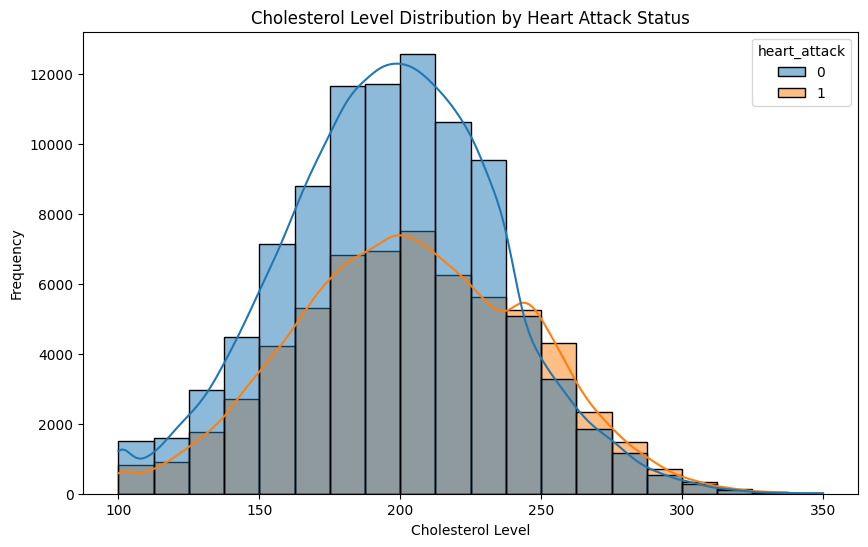

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='cholesterol_level', hue='heart_attack', kde=True, bins=20)
plt.title('Cholesterol Level Distribution by Heart Attack Status')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.show()

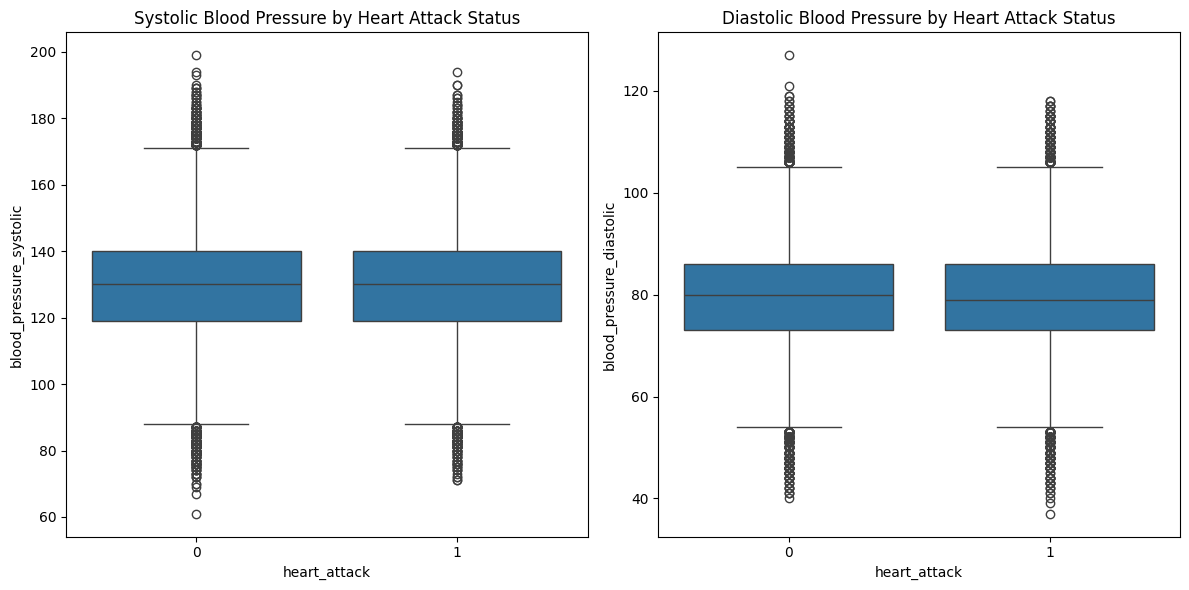

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='heart_attack', y='blood_pressure_systolic', data=df)
plt.title('Systolic Blood Pressure by Heart Attack Status')

plt.subplot(1, 2, 2)
sns.boxplot(x='heart_attack', y='blood_pressure_diastolic', data=df)
plt.title('Diastolic Blood Pressure by Heart Attack Status')
plt.tight_layout()
plt.show()

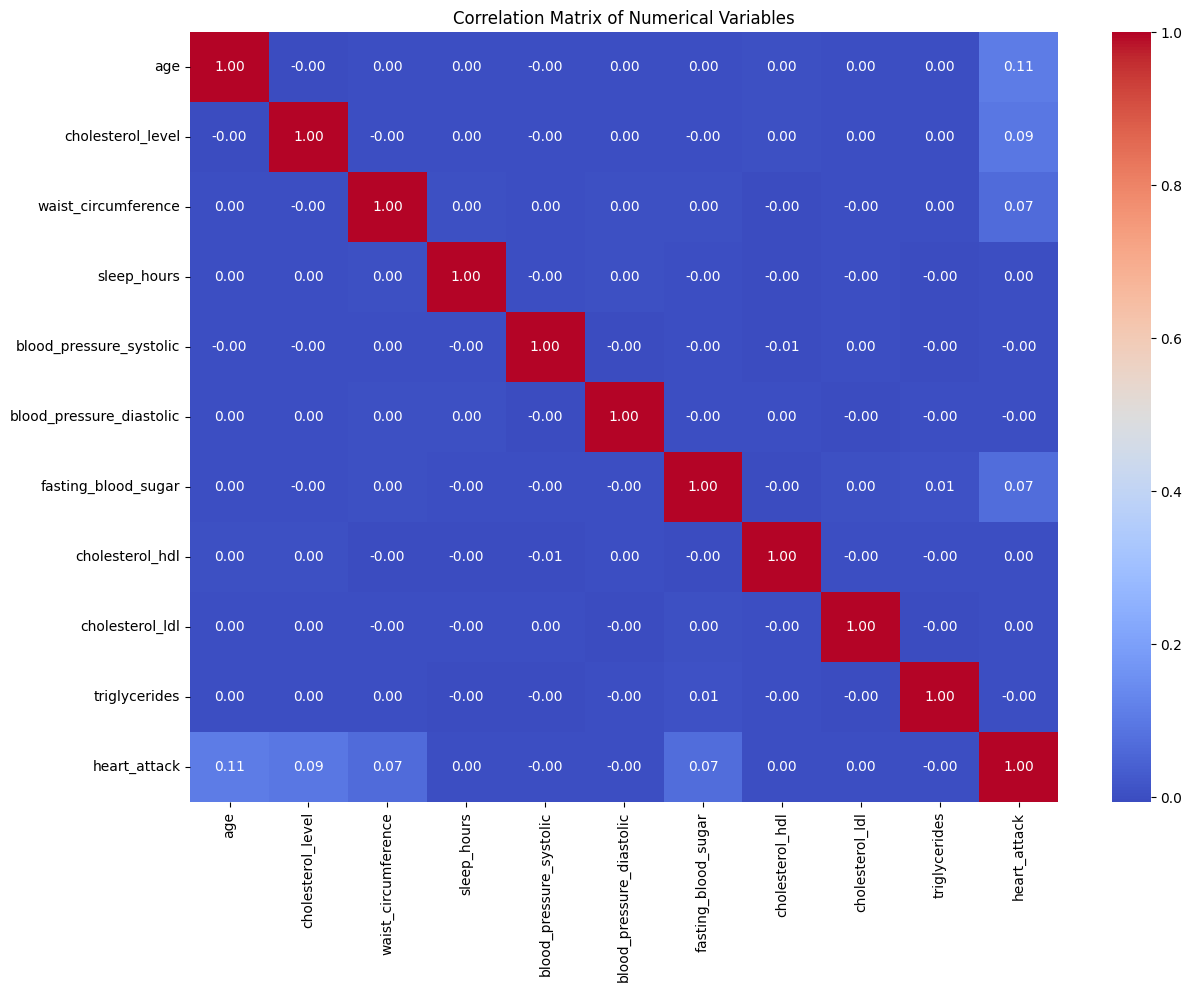

In [20]:
# Select only numerical columns for correlation
numerical_df = df[numerical_cols + ['heart_attack']]

plt.figure(figsize=(14, 10))
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [23]:
df['heart_attack'].value_counts()

heart_attack
0    94854
1    63501
Name: count, dtype: int64

In [27]:
# --- FIX 2: HANDLE MULTICOLLINEARITY ---
# We will remove one of each pair of features with a correlation > 0.8
# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

print("Features to drop due to high multicollinearity:", to_drop)
df.drop(columns=to_drop, inplace=True)

# Update the list of numerical columns
numerical_cols = [col for col in numerical_cols if col not in to_drop]
print("Updated numerical columns:", numerical_cols)
print("\n")

Features to drop due to high multicollinearity: []
Updated numerical columns: ['age', 'cholesterol_level', 'waist_circumference', 'sleep_hours', 'blood_pressure_systolic', 'blood_pressure_diastolic', 'fasting_blood_sugar', 'cholesterol_hdl', 'cholesterol_ldl', 'triglycerides']




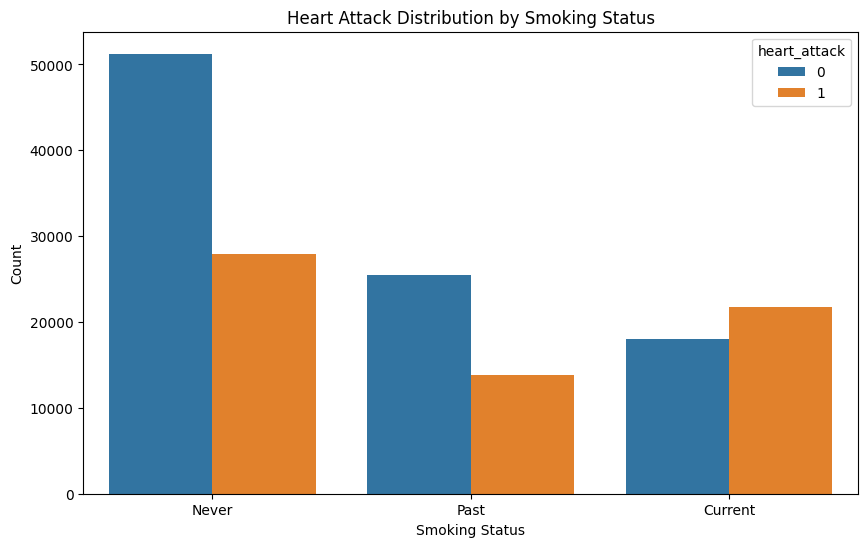

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_status', hue='heart_attack', data=df)
plt.title('Heart Attack Distribution by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

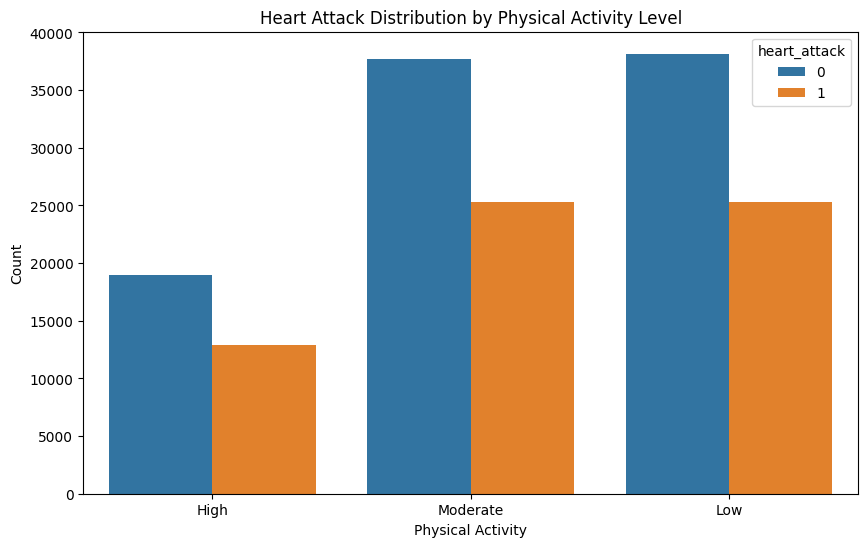

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='physical_activity', hue='heart_attack', data=df)
plt.title('Heart Attack Distribution by Physical Activity Level')
plt.xlabel('Physical Activity')
plt.ylabel('Count')
plt.show()